In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import glob
import pandas as pd

In [30]:
log_files = glob.glob( '/mnt/home/siqi/x_models/debug/log.*' )
print 'log files', log_files

log files ['/mnt/home/siqi/x_models/debug/log.config_dense-sgd-0.01-True-20170215-003302', '/mnt/home/siqi/x_models/debug/log.config_dense-adam-0.001-True-20170227-083954-0.2', '/mnt/home/siqi/x_models/debug/log.config_dense-sgd-0.001-False-20170215-092143', '/mnt/home/siqi/x_models/debug/log.config_dense-sgd-0.001-False-20170217-103646', '/mnt/home/siqi/x_models/debug/log.config_dense-adam-0.001-False-20170215-092103', '/mnt/home/siqi/x_models/debug/log.config_dense-adam-0.001-True-20170215-092129', '/mnt/home/siqi/x_models/debug/log.config_dense-adam-0.001-True-20170304-105454', '/mnt/home/siqi/x_models/debug/log.config_dense-sgd-0.01-True-20170215-092117', '/mnt/home/siqi/x_models/debug/log.config_dense-sgd-0.01-True-20170227-083940', '/mnt/home/siqi/x_models/debug/log.config_dense-adam-0.001-True-20170227-092634', '/mnt/home/siqi/x_models/debug/log.config_dense-sgd-0.01-True-20170227-083944-0.22']


In [8]:
def ParseFilename(filename):
    filename = os.path.basename(filename)
    portions = filename.split('-')
    
    settings = dict()
    settings['config'] = portions[0][4:]
    settings['optimizer'] = portions[1]
    settings['init_lr'] = portions[2]
    settings['reduce_lr'] = portions[3].lower() == 'true'
    settings['time'] = portions[4] + '-' + portions[5]
    if len(portions) == 7:
        settings['dropout'] = np.float(portions[6])
    #print portions
    return settings

In [28]:
def PlotLog(filename):
    con = pd.read_csv(filename, sep=' ', header=None)
    con.columns =['epoch','cost_train','cost_train_weighted','train_norm','cost_valid','cost_valid_weighted','valid_norm',\
                  'train_Long_2L', 'train_Long_L', 'train_Long_L/2', 'train_Long_L/5' ,'train_Long_L/10', \
                  'train_Med_2L', 'train_Med_L', 'train_Med_L/2', 'train_Med_L/5' ,'train_Med_L/10', \
                  'train_ML_2L', 'train_ML_L', 'train_ML_L/2', 'train_ML_L/5' ,'train_ML_L/10', \
                  'valid_Long_2L', 'valid_Long_L', 'valid_Long_L/2', 'valid_Long_L/5' ,'valid_Long_L/10', \
                  'valid_Med_2L', 'valid_Med_L', 'valid_Med_L/2', 'valid_Med_L/5' ,'valid_Med_L/10', \
                  'valid_ML_2L', 'valid_ML_L', 'valid_ML_L/2', 'valid_ML_L/5' ,'valid_ML_L/10', 'time']

    fig = plt.figure(figsize=(12, 5))

    fig.add_subplot(121)
    plt.plot( con['cost_train_weighted'], '.-', label='train')
    plt.plot( con['cost_valid_weighted'], '8--', label='valid')
    plt.legend()
    plt.title('Loss')

    fig.add_subplot(122)
    plt.plot( con['train_Long_L/2'], '.-', label='train')
    plt.plot( con['valid_Long_L/2'], '8--', label='valid')
    plt.legend(loc=4)
    plt.title('Accuracy (L/2) ')
    return con

{'optimizer': 'sgd', 'time': '20170215-003302', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': '0.01'}


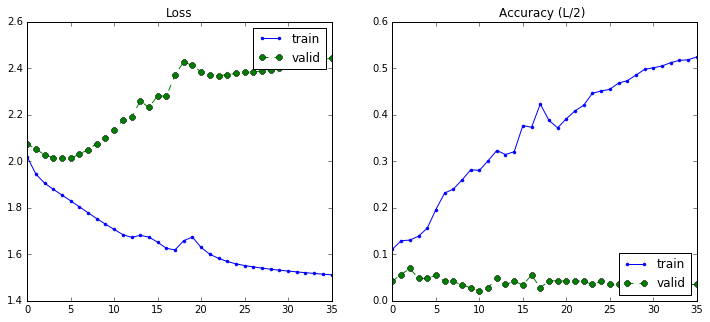

{'optimizer': 'sgd', 'time': '20170215-092143', 'config': 'config_dense', 'reduce_lr': False, 'init_lr': '0.001'}


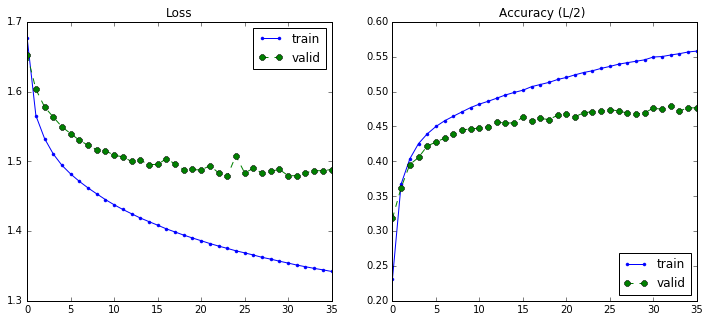

{'optimizer': 'sgd', 'time': '20170217-103646', 'config': 'config_dense', 'reduce_lr': False, 'init_lr': '0.001'}


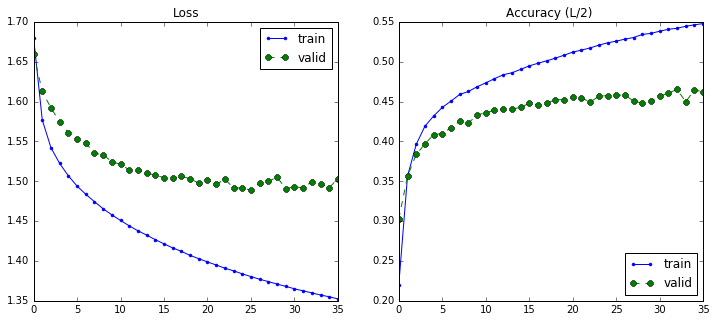

{'optimizer': 'adam', 'time': '20170215-092103', 'config': 'config_dense', 'reduce_lr': False, 'init_lr': '0.001'}


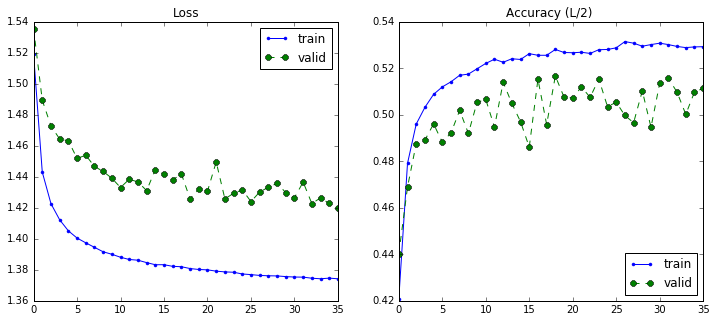

{'optimizer': 'adam', 'time': '20170215-092129', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': '0.001'}


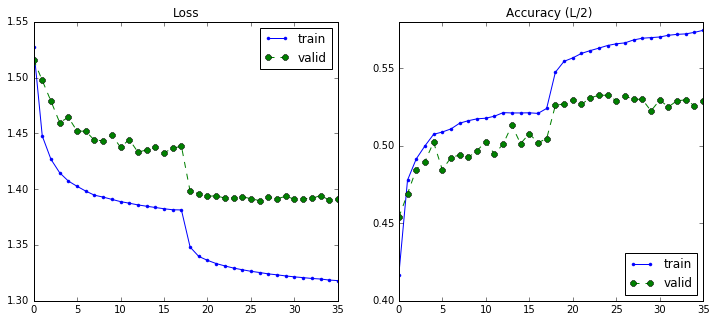

{'optimizer': 'adam', 'time': '20170304-105454', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': '0.001'}


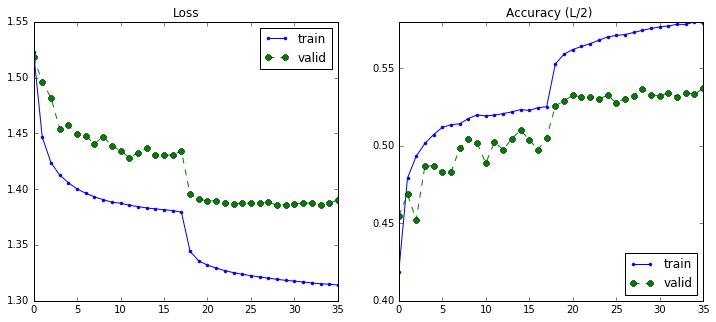

{'optimizer': 'sgd', 'time': '20170215-092117', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': '0.01'}


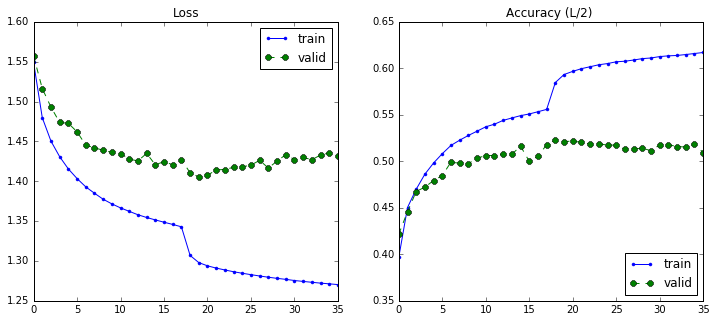

In [31]:
train_error_small = dict()
for f in log_files:
    if '0227' in f:
        continue
    print ParseFilename(f)
    train_error_small[ os.path.basename(f) ] = PlotLog(f)
    plt.show()

{'optimizer': 'adam', 'dropout': 0.2, 'reduce_lr': True, 'time': '20170227-083954', 'init_lr': '0.001', 'config': 'config_dense'}


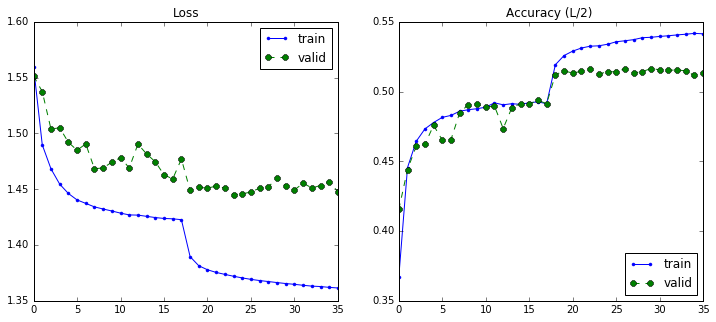

{'optimizer': 'sgd', 'time': '20170227-083940', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': '0.01'}


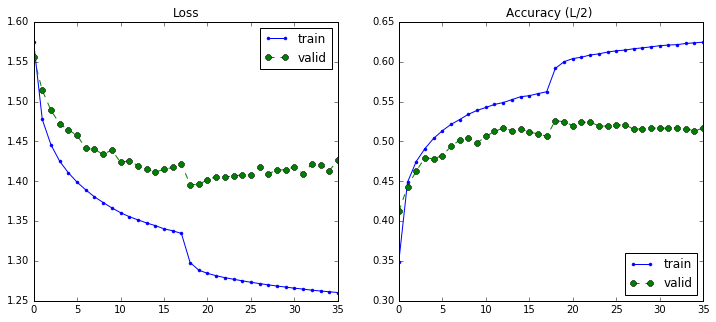

{'optimizer': 'adam', 'time': '20170227-092634', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': '0.001'}


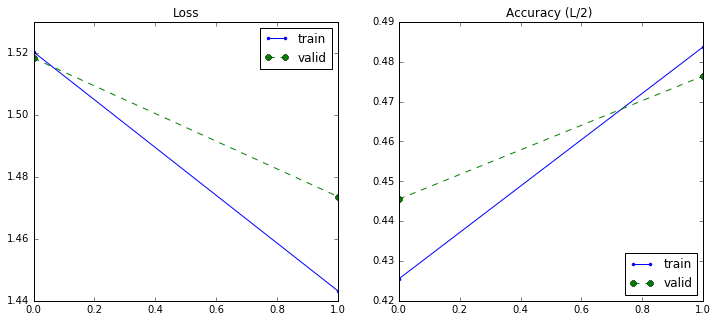

{'optimizer': 'sgd', 'dropout': 0.22, 'reduce_lr': True, 'time': '20170227-083944', 'init_lr': '0.01', 'config': 'config_dense'}


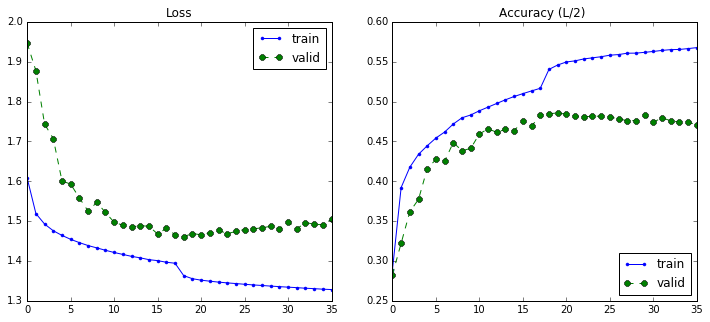

In [32]:
train_error_big = dict()
for f in log_files:
    if not '0227' in f:
        continue
    print ParseFilename(f)
    train_error_big[ os.path.basename(f) ] = PlotLog(f)
    plt.show()

In [33]:
def ReadAccuracy( filename, res_folder = './res/', task = ['casp', 'cameo76', 'mems400'], n_epochs = 36):
    filename = filename.replace('log.', '')
    res = dict()
    for t in task:
        content = pd.DataFrame()
        for e in xrange(n_epochs):
            f = os.path.join(res_folder, filename+ '-' + str(e) + '.pkl.' + t )
            if not os.path.isfile(f):
                return None
            c = pd.read_csv(f, sep=' ', header=None)
            c.columns =  ['Long_2L', 'Long_L', 'Long_L/2', 'Long_L/5' ,'Long_L/10', \
                      'Med_2L', 'Med_L', 'Med_L/2', 'Med_L/5' ,'Med_L/10', \
                      'ML_2L', 'ML_L', 'ML_L/2', 'ML_L/5' ,'ML_L/10']
            content = content.append(c[:-1])
        res[t] = content
    return res

{'optimizer': 'sgd', 'time': '20170215-003302', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': '0.01'}


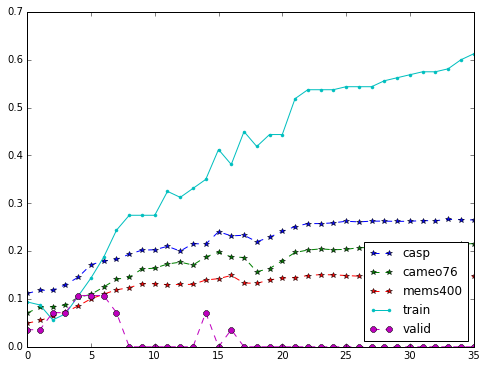

{'optimizer': 'sgd', 'time': '20170215-092143', 'config': 'config_dense', 'reduce_lr': False, 'init_lr': '0.001'}


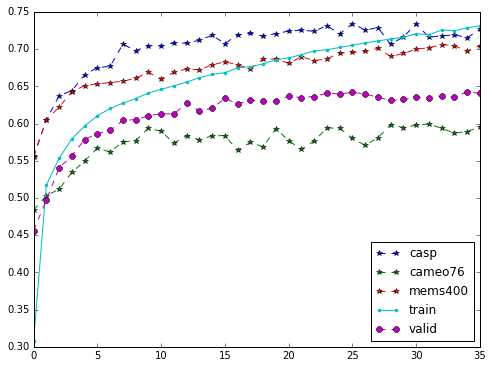

{'optimizer': 'sgd', 'time': '20170217-103646', 'config': 'config_dense', 'reduce_lr': False, 'init_lr': '0.001'}


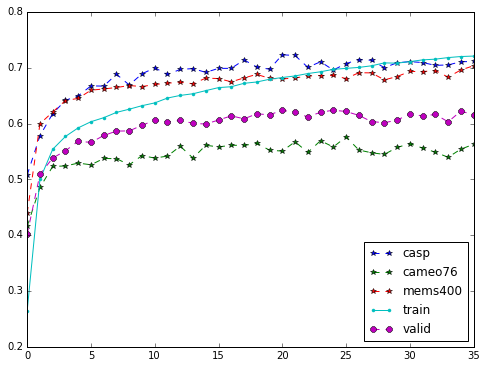

{'optimizer': 'adam', 'time': '20170215-092103', 'config': 'config_dense', 'reduce_lr': False, 'init_lr': '0.001'}


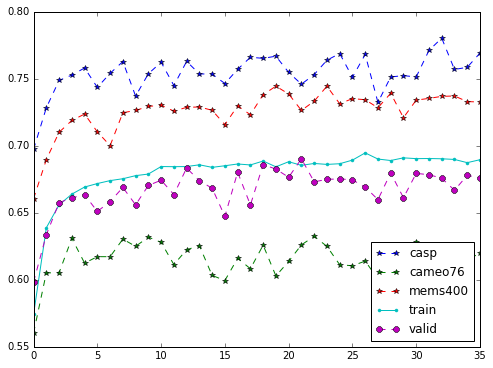

{'optimizer': 'adam', 'time': '20170215-092129', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': '0.001'}


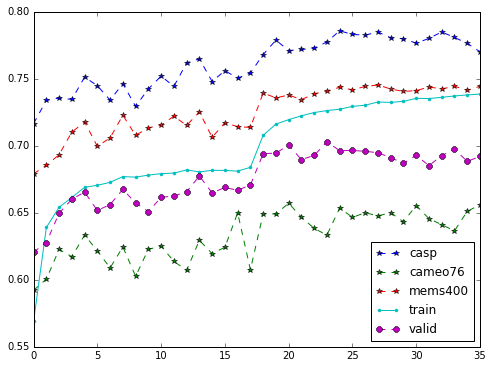

{'optimizer': 'adam', 'time': '20170304-105454', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': '0.001'}
{'optimizer': 'sgd', 'time': '20170215-092117', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': '0.01'}


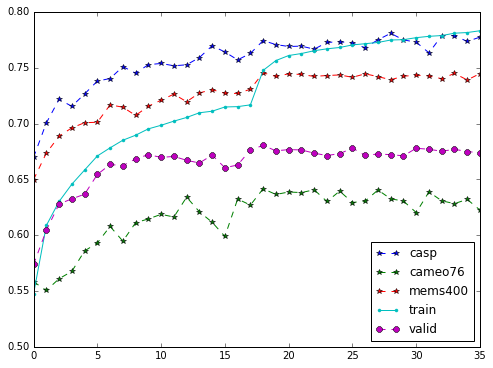

In [34]:
task_accuracy_small = dict()
for f in log_files:
    if '0227' in f:
        continue
    print ParseFilename(f)
    task_accuracy_small[ os.path.basename(f) ] = ReadAccuracy( os.path.basename(f) )
    if  task_accuracy_small[ os.path.basename(f) ] is None:
        continue
        
    plt.subplots( figsize=(8, 6))
    for t in ['casp', 'cameo76', 'mems400']:
        plt.plot( task_accuracy_small[ os.path.basename(f) ][t]['Long_L/10'].values, '*--', label=t )
    
    con = train_error_small[ os.path.basename(f) ]
    plt.plot( con['train_Long_L/10'], '.-', label='train')
    plt.plot( con['valid_Long_L/10'], '8--', label='valid')
    
    plt.legend(loc=4)
    plt.show()

{'optimizer': 'adam', 'dropout': 0.2, 'reduce_lr': True, 'time': '20170227-083954', 'init_lr': 0.001, 'config': 'config_dense'}


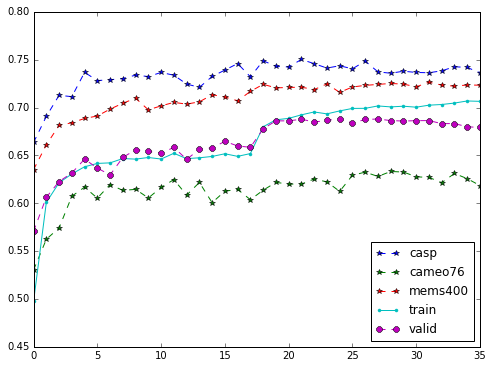

{'optimizer': 'sgd', 'time': '20170227-083940', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': 0.01}


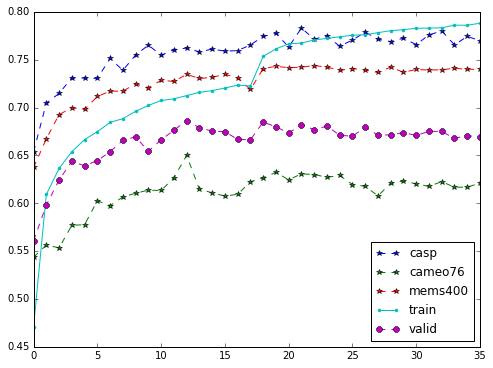

{'optimizer': 'adam', 'time': '20170227-092634', 'config': 'config_dense', 'reduce_lr': True, 'init_lr': 0.001}
{'optimizer': 'sgd', 'dropout': 0.22, 'reduce_lr': True, 'time': '20170227-083944', 'init_lr': 0.01, 'config': 'config_dense'}


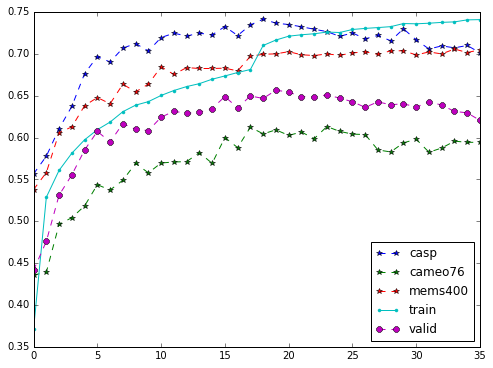

In [64]:
task_accuracy_big = dict()
for f in log_files:
    if not '0227' in f:
        continue
    print ParseFilename(f)
    task_accuracy_big[ os.path.basename(f) ] = ReadAccuracy( os.path.basename(f) )
    if  task_accuracy_big[ os.path.basename(f) ] is None:
        continue
    plt.subplots( figsize=(8, 6))
    for t in ['casp', 'cameo76', 'mems400']:
        plt.plot( task_accuracy_big[ os.path.basename(f) ][t]['Long_L/10'].values, '*--', label=t )
    
    con = train_error_big[ os.path.basename(f) ]
    plt.plot( con['train_Long_L/10'], '.-', label='train')
    plt.plot( con['valid_Long_L/10'], '8--', label='valid')
    
    plt.legend(loc=4)
    plt.show()

In [22]:
log_files = glob.glob( '/mnt/home/siqi/x_models/dense_largest/log.*20170314*' )
print 'log files', log_files

log files ['/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.0001-True-20170314-104128-0.3']


/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.0001-True-20170314-104128-0.3
{'optimizer': 'adam', 'dropout': 0.3, 'reduce_lr': True, 'time': '20170314-104128', 'init_lr': '0.0001', 'config': 'config_dense'}


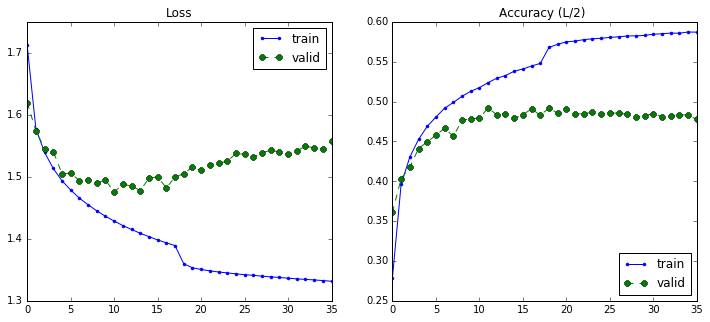

In [23]:
train_error_big = dict()
for f in log_files:
    print f
    print ParseFilename(f)
    train_error_big[ os.path.basename(f) ] = PlotLog(f)
    plt.show()

{'optimizer': 'adam', 'dropout': 0.3, 'reduce_lr': True, 'time': '20170314-104128', 'init_lr': '0.0001', 'config': 'config_dense'}


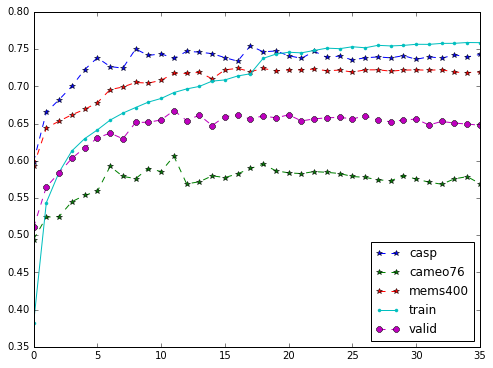

In [24]:
task_accuracy_big = dict()
for f in log_files:
    
    print ParseFilename(f)
    task_accuracy_big[ os.path.basename(f) ] = ReadAccuracy( os.path.basename(f) )
    if  task_accuracy_big[ os.path.basename(f) ] is None:
        print 'not available'
        continue
    plt.subplots( figsize=(8, 6))
    for t in ['casp', 'cameo76', 'mems400']:
        plt.plot( task_accuracy_big[ os.path.basename(f) ][t]['Long_L/10'].values, '*--', label=t )
    
    con = train_error_big[ os.path.basename(f) ]
    plt.plot( con['train_Long_L/10'], '.-', label='train')
    plt.plot( con['valid_Long_L/10'], '8--', label='valid')
    
    plt.legend(loc=4)
    plt.show()

In [26]:
log_files = glob.glob( '/mnt/home/siqi/x_models/dense_largest/log.*' )
print 'log files', log_files

log files ['/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.0001-True-20170314-104128-0.3', '/mnt/home/siqi/x_models/dense_largest/log.config_dense-sgd-0.001-True-20170313-223239-0.3', '/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.001-True-20170321-003348-0.4', '/mnt/home/siqi/x_models/dense_largest/log.config_dense-sgd-0.001-True-20170321-002113-0.4', '/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.0001-True-20170322-113246-0.4', '/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-1e-05-True-20170313-224425-0.3', '/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.001-True-20170313-224139-0.3', '/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.0001-True-20170321-003402-0.4', '/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.0001-True-20170322-113102-0.4', '/mnt/home/siqi/x_models/dense_largest/log.config_dense-sgd-0.001-True-20170322-112416-0.4']


/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.0001-True-20170314-104128-0.3
{'optimizer': 'adam', 'dropout': 0.3, 'reduce_lr': True, 'time': '20170314-104128', 'init_lr': '0.0001', 'config': 'config_dense'}


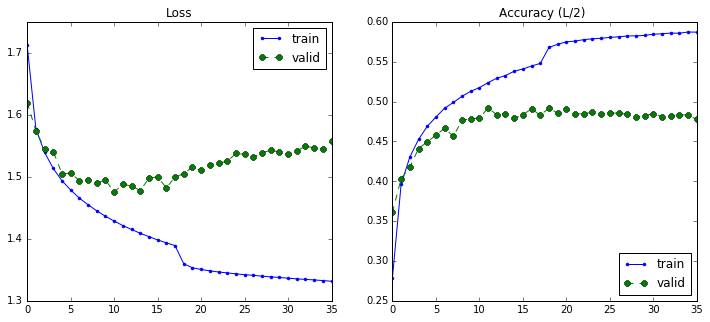

/mnt/home/siqi/x_models/dense_largest/log.config_dense-sgd-0.001-True-20170313-223239-0.3
{'optimizer': 'sgd', 'dropout': 0.3, 'reduce_lr': True, 'time': '20170313-223239', 'init_lr': '0.001', 'config': 'config_dense'}


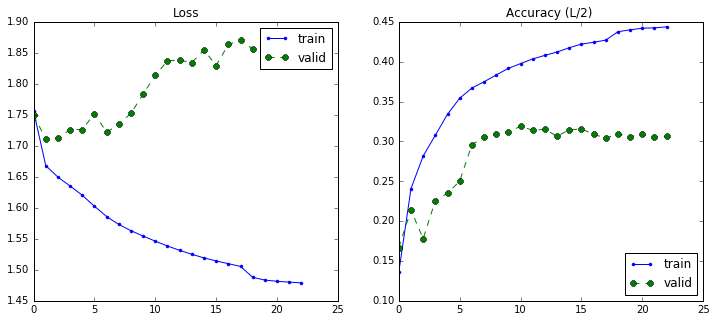

/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.001-True-20170321-003348-0.4
{'optimizer': 'adam', 'dropout': 0.4, 'reduce_lr': True, 'time': '20170321-003348', 'init_lr': '0.001', 'config': 'config_dense'}


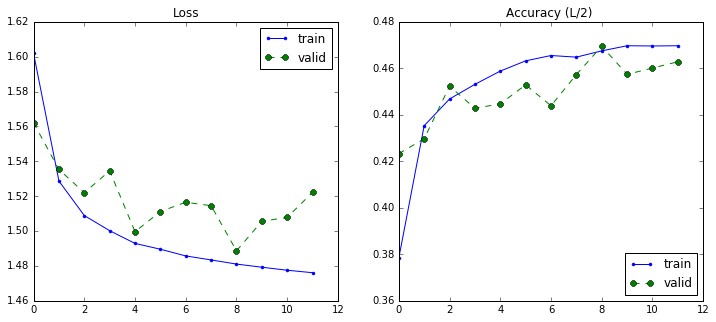

/mnt/home/siqi/x_models/dense_largest/log.config_dense-sgd-0.001-True-20170321-002113-0.4
{'optimizer': 'sgd', 'dropout': 0.4, 'reduce_lr': True, 'time': '20170321-002113', 'init_lr': '0.001', 'config': 'config_dense'}


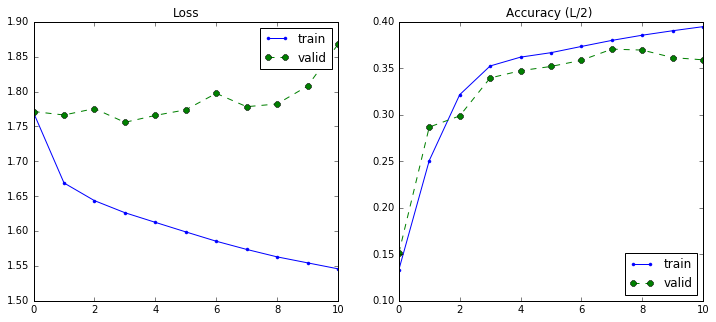

/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.0001-True-20170322-113246-0.4
{'optimizer': 'adam', 'dropout': 0.4, 'reduce_lr': True, 'time': '20170322-113246', 'init_lr': '0.0001', 'config': 'config_dense'}


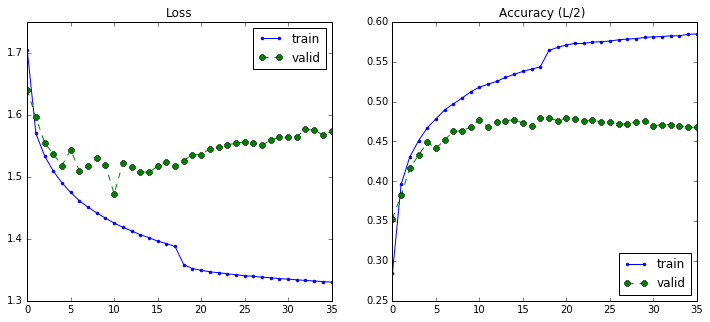

/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-1e-05-True-20170313-224425-0.3
{'optimizer': 'adam', 'time': 'True-20170313', 'config': 'config_dense', 'reduce_lr': False, 'init_lr': '1e'}


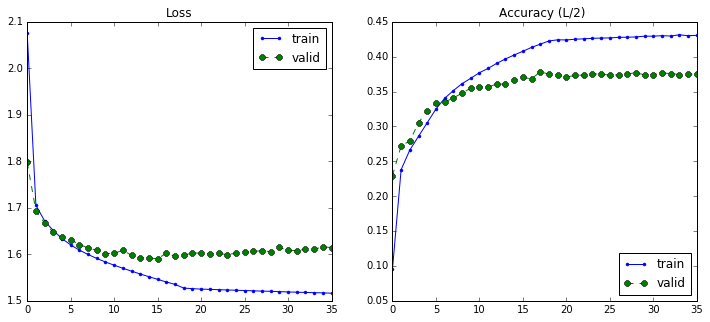

/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.001-True-20170313-224139-0.3
{'optimizer': 'adam', 'dropout': 0.3, 'reduce_lr': True, 'time': '20170313-224139', 'init_lr': '0.001', 'config': 'config_dense'}


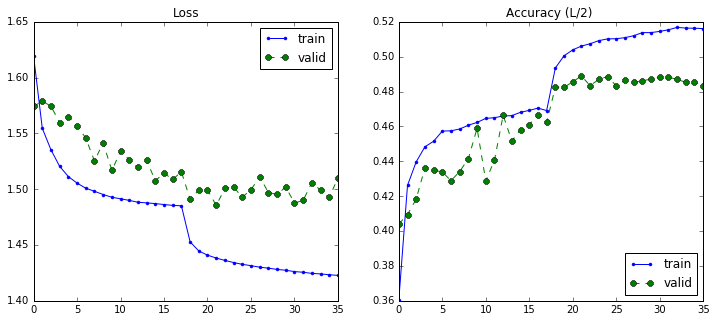

/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.0001-True-20170321-003402-0.4
{'optimizer': 'adam', 'dropout': 0.4, 'reduce_lr': True, 'time': '20170321-003402', 'init_lr': '0.0001', 'config': 'config_dense'}


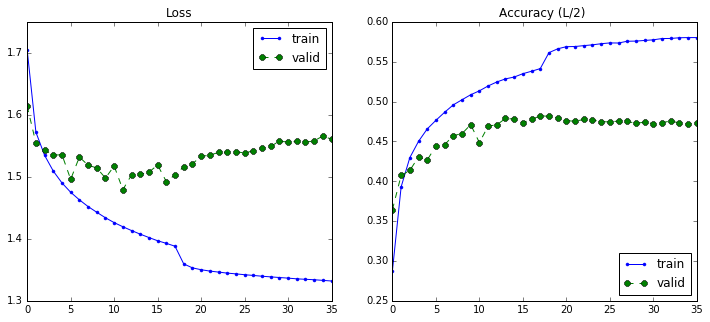

/mnt/home/siqi/x_models/dense_largest/log.config_dense-adam-0.0001-True-20170322-113102-0.4
{'optimizer': 'adam', 'dropout': 0.4, 'reduce_lr': True, 'time': '20170322-113102', 'init_lr': '0.0001', 'config': 'config_dense'}


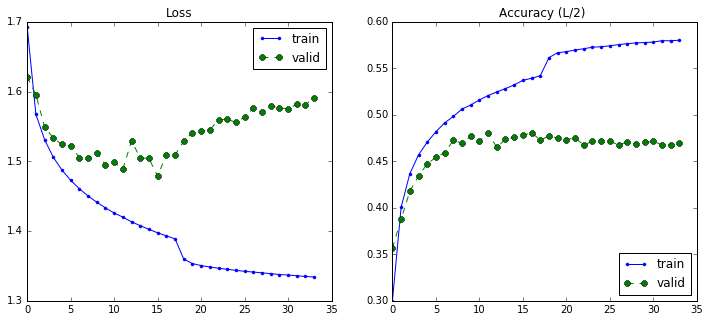

/mnt/home/siqi/x_models/dense_largest/log.config_dense-sgd-0.001-True-20170322-112416-0.4
{'optimizer': 'sgd', 'dropout': 0.4, 'reduce_lr': True, 'time': '20170322-112416', 'init_lr': '0.001', 'config': 'config_dense'}


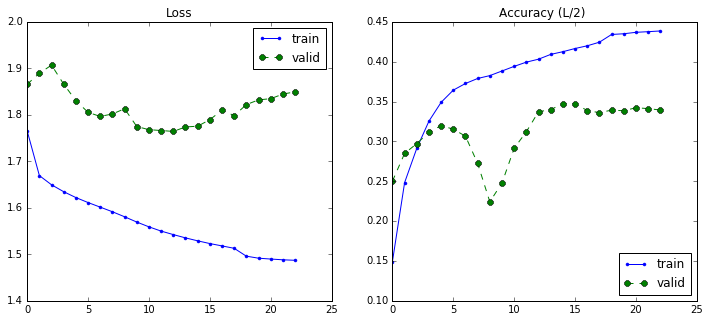

In [27]:
train_error_big = dict()
for f in log_files:
    print f
    print ParseFilename(f)
    train_error_big[ os.path.basename(f) ] = PlotLog(f)
    plt.show()